파이토치(PyTorch) 튜토리얼
https://tutorials.pytorch.kr/


# 파이토치(PyTorch)

* 페이스북이 초기 루아(Lua) 언어로 개발된 토치(Torch)를 파이썬 버전으로 개발하여 2017년도에 공개
* 초기에 토치(Torch)는 넘파이(NumPy) 라이브러리처럼 과학 연산을 위한 라이브러리로 공개
* 이후 GPU를 이용한 텐서 조작 및 동적 신경망 구축이 가능하도록 딥러닝 프레임워크로 발전시킴
* 파이썬답게 만들어졌고, 유연하면서도 가속화된 계산 속도를 제공


## 파이토치의 구성요소

- `torch`: 메인 네임스페이스, 텐서 등의 다양한 수학 함수가 포함
- `torch.autograd`: 자동 미분 기능을 제공하는 라이브러리
- `torch.nn`: 신경망 구축을 위한 데이터 구조나 레이어 등의 라이브러리
- `torch.multiprocessing`: 병럴처리 기능을 제공하는 라이브러리
- `torch.optim`: SGD(Stochastic Gradient Descent)를 중심으로 한 파라미터 최적화 알고리즘 제공
- `torch.utils`: 데이터 조작 등 유틸리티 기능 제공
- `torch.onnx`: ONNX(Open Neural Network Exchange), 서로 다른 프레임워크 간의 모델을 공유할 때 사용


## 텐서(Tensors)

* 데이터 표현을 위한 기본 구조로 텐서(tensor)를 사용
* 텐서는 데이터를 담기위한 컨테이너(container)로서 일반적으로 수치형 데이터를 저장
* 넘파이(NumPy)의 ndarray와 유사
* GPU를 사용한 연산 가속 가능


In [1]:
import torch

torch.__version__

'1.12.1+cu113'

In [ ]:
x = torch.rand(4,2)
x

tensor([[0.1417, 0.7816],
        [0.1170, 0.2641],
        [0.3864, 0.9549],
        [0.9241, 0.9218]])

In [ ]:
x = torch.zeros(4,2,dtype=torch.long)
x

tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])

In [ ]:
x = torch.tensor([3,2.3])
x

tensor([3.0000, 2.3000])

In [ ]:
x = x.new_ones(2,4,dtype=torch.double)
x

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)

In [ ]:
print(x.size())
print(x.shape)

torch.Size([2, 4])
torch.Size([2, 4])


| Data type | dtype | CPU tensor | GPU tensor |
| ------ | ------ | ------ | ------ |
| 32-bit floating point | `torch.float32` or `torch.float` |`torch.FloatTensor` | `torch.cuda.FloatTensor` |
| 64-bit floating point | `torch.float64` or `torch.double` |`torch.DoubleTensor` | `torch.cuda.DoubleTensor` |
| 16-bit floating point | `torch.float16` or `torch.half` |`torch.HalfTensor` | `torch.cuda.HalfTensor` |
| 8-bit integer(unsinged) | `torch.uint8` |`torch.ByteTensor` | `torch.cuda.ByteTensor` |
| 8-bit integer(singed) | `torch.int8` |`torch.CharTensor` | `torch.cuda.CharTensor` |
| 16-bit integer(signed) | `torch.int16` or `torch.short` |`torch.ShortTensor` | `torch.cuda.ShortTensor` |
| 32-bit integer(signed) | `torch.int32` or `torch.int` |`torch.IntTensor` | `torch.cuda.IntTensor` |
| 64-bit integer(signed) | `torch.int64` or `torch.long` |`torch.LongTensor` | `torch.cuda.LongTensor` |


In [ ]:
ft = torch.FloatTensor([1,2,3])
print(ft.short())
print(ft.int())
print(ft.long())

tensor([1, 2, 3], dtype=torch.int16)
tensor([1, 2, 3], dtype=torch.int32)
tensor([1, 2, 3])


In [ ]:
it = torch.IntTensor([1,2,3])
print(it)
print(it.dtype)


tensor([1, 2, 3], dtype=torch.int32)
torch.int32


In [ ]:
print(it.float())
print(it.double())
print(it.half())

tensor([1., 2., 3.])
tensor([1., 2., 3.], dtype=torch.float64)
tensor([1., 2., 3.], dtype=torch.float16)


### CUDA Tensors
- .to 메소드를 사용하여 텐서를 어떠한 장치(cpu, gpu)로도 옮길 수 있음

NVIDIA가 만든 병렬 컴퓨팅 플랫폼 및 API 모델로, 보통 '쿠다'라고 발음한다. CUDA 플랫폼은 GPU 의 가상 명령어셋을 사용할 수 있도록 만들어주는 소프트웨어 레이어이며, NVIDIA가 만든 CUDA 코어가 장착된 GPU에서 작동


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [ ]:
# 0D Tensor
t0 = torch.tensor(0)
print(t0.ndim)
print(t0.shape)
print(t0)

0
torch.Size([])
tensor(0)


## 과제_1107_1 아래 Tensor들을 생성하세요.

In [ ]:
# 1D Tensor

In [ ]:
# 2D Tensor

In [ ]:
# 3D Tensor

In [ ]:
# 4D Tensor

In [ ]:
# 5D Tensor

### 과제_1107_2. numpy random으로 수행할 수 있는 형태를 설명하고 각 경우의 사례를 제시하세요.

### 과제_1107_3 아래 torch에서 활용하는 랜덤 값을 가지는 텐서와 특정한 값을 가지는 텐서 생성 사례를 제시하세요

º 랜덤한 값을 가지는 텐서 생성

1. torch.rand() : 0과 1 사이의 숫자를 균등하게 생성

2. torch.rand_like() : 사이즈를 튜플로 입력하지 않고 기존의 텐서로 정의

3. torch.randn() : 평균이 0이고 표준편차가 1인 가우시안 정규분포를 이용해 생성

4. torch.randn_like() :  사이즈를 튜플로 입력하지 않고 기존의 텐서로 정의

5. torch.randint() : 주어진 범위 내의 정수를 균등하게 생성, 자료형은 torch.float32

6. torch.randint_like() : 사이즈를 튜플로 입력하지 않고 기존의 텐서로 정의

7. torch.randperm() : 주어진 범위 내의 정수를 랜덤하게 생성

º 특정한 값을 가지는 텐서 생성

1. torch.arange() : 주어진 범위 내의 정수를 순서대로 생성

2. torch.ones() : 주어진 사이즈의 1로 이루어진 텐서 생성

3. torch.zeros() : 주어진 사이즈의 0으로 이루어진 텐서 생성

4. torch.ones_like() : 사이즈를 튜플로 입력하지 않고 기존의 텐서로 정의

5. torch.zeros_like() : 사이즈를 튜플로 입력하지 않고 기존의 텐서로 정의

6. torch.linspace() : 시작점과 끝점을 주어진 갯수만큼 균등하게 나눈 간격점을 행벡터로 출력

7. torch.logspace() : 시작점과 끝점을 주어진 갯수만큼 로그간격으로 나눈 간격점을 행벡터로 출력


In [ ]:
import math

a = torch.randn(1,2)
print(a)
b = a * 2 - 1
print(b)

tensor([[-1.4255, -0.2035]])
tensor([[-3.8510, -1.4070]])


In [ ]:
# b에 대하여 min, max, mean, std, prod 을 구해보세요.

print(torch.min(b))
print(torch.max(b))
print(torch.mean(b))
print(torch.std(b))
print(torch.prod(b))
print(torch.unique(torch.tensor([1,2,3,1,2,1])))


tensor(-3.8510)
tensor(-1.4070)
tensor(-2.6290)
tensor(1.7282)
tensor(5.4186)
tensor([1, 2, 3])


In [ ]:
x = torch.rand(2,2)
print(x)


tensor([[0.7097, 0.9583],
        [0.8216, 0.3094]])


In [ ]:
print(x.max(dim=0),'\n')
print(x.max(dim=1))

torch.return_types.max(
values=tensor([0.8216, 0.9583]),
indices=tensor([1, 0])) 

torch.return_types.max(
values=tensor([0.9583, 0.8216]),
indices=tensor([1, 0]))


In [ ]:
# 4칙 연산 : add, sub, mul, div

In [ ]:
x = torch.tensor([[1,2,3],[2,3,4]])
y = torch.tensor([[1,2,4],[2,3,5]])

print(x)
print(y, '\n')

print(torch.add(x,y),'\n')
print(torch.sub(x,y),'\n')
print(torch.mul(x,y),'\n')
print(torch.div(x,y))


tensor([[1, 2, 3],
        [2, 3, 4]])
tensor([[1, 2, 4],
        [2, 3, 5]]) 

tensor([[2, 4, 7],
        [4, 6, 9]]) 

tensor([[ 0,  0, -1],
        [ 0,  0, -1]]) 

tensor([[ 1,  4, 12],
        [ 4,  9, 20]]) 

tensor([[1.0000, 1.0000, 0.7500],
        [1.0000, 1.0000, 0.8000]])


### 과제_1107_4.
2D Tensor x,y를 생성한 후 x,y의 내적을 구하세요.(torch.matmul 혹은 torch.mm을 사용)

### 과제_1107_5.
위에서 구한 내적 결과를 특이값 분해하여 U, S, V Tensor를 구하세요.

In [ ]:
x = torch.Tensor([[1,2],[3,4]])
print(x)

tensor([[1., 2.],
        [3., 4.]])


In [ ]:
print(x[0,0])
print(x[0])
print(x[0:])
print(x[:,:1])
print(x[1][1])
print(x[::2,:])
print(x[:-1,:])
print(x[-1,-1])

tensor(1.)
tensor([1., 2.])
tensor([[1., 2.],
        [3., 4.]])
tensor([[1.],
        [3.]])
tensor(4.)
tensor([[1., 2.]])
tensor([[1., 2.]])
tensor(4.)


In [ ]:
x = torch.FloatTensor([
    [1,2],
    [3,4],
    [5,6],
    [7,8]
])
print(x.size())
print(x.shape)
print(x.dim())
print(x.size(0))
print(x.size(1))

torch.Size([4, 2])
torch.Size([4, 2])
2
4
2


In [ ]:
# 차원을 축소
tensor = torch.rand(1,3,3)
print(tensor)
print(tensor.shape)

tensor([[[0.5272, 0.8853, 0.5583],
         [0.0796, 0.0238, 0.2520],
         [0.8828, 0.7182, 0.3493]]])
torch.Size([1, 3, 3])


In [ ]:
t = tensor.squeeze()
print(t,t.shape)

tensor([[0.5272, 0.8853, 0.5583],
        [0.0796, 0.0238, 0.2520],
        [0.8828, 0.7182, 0.3493]]) torch.Size([3, 3])


In [ ]:
# 차원 증가
t = torch.rand(3,3)
print(t)
print(t.shape)

tensor([[0.7084, 0.8869, 0.1091],
        [0.5136, 0.5246, 0.4537],
        [0.5144, 0.2013, 0.7318]])
torch.Size([3, 3])


In [ ]:
tensor = t.unsqueeze(dim=0)
print(tensor)
print(tensor.shape)

tensor([[[0.7084, 0.8869, 0.1091],
         [0.5136, 0.5246, 0.4537],
         [0.5144, 0.2013, 0.7318]]])
torch.Size([1, 3, 3])


In [ ]:
tensor = t.unsqueeze(dim=2)
print(tensor)
print(tensor.shape)

tensor([[[0.7084],
         [0.8869],
         [0.1091]],

        [[0.5136],
         [0.5246],
         [0.4537]],

        [[0.5144],
         [0.2013],
         [0.7318]]])
torch.Size([3, 3, 1])


In [ ]:
# 텐서간 결합 : stack
x = torch.FloatTensor([1,4])
print(x,'\n')
y = torch.FloatTensor([2,5])
print(y,'\n')
z = torch.FloatTensor([3,6])
print(z,'\n')
print(torch.stack([x,y,z]))

tensor([1., 4.]) 

tensor([2., 5.]) 

tensor([3., 6.]) 

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


In [ ]:
# cat : 쌓을 dim이 존재해야 함
a = torch.randn(1,3,3)
b = torch.randn(1,3,3)
c = torch.cat((a,b), dim=1)
print(a,'\n')
print(b,'\n')
print(c,c.size())

tensor([[[-0.7917,  1.0278,  0.6722],
         [-0.6931,  1.0134,  0.3243],
         [-1.3407,  0.2216,  0.8037]]]) 

tensor([[[-0.2434,  0.3251,  0.4919],
         [-0.7585, -0.5574, -0.5607],
         [-0.5696,  0.3297, -0.4040]]]) 

tensor([[[-0.7917,  1.0278,  0.6722],
         [-0.6931,  1.0134,  0.3243],
         [-1.3407,  0.2216,  0.8037],
         [-0.2434,  0.3251,  0.4919],
         [-0.7585, -0.5574, -0.5607],
         [-0.5696,  0.3297, -0.4040]]]) torch.Size([1, 6, 3])


In [ ]:
c = torch.cat((a,b), dim=0)
print(c,c.size())

tensor([[[-0.7917,  1.0278,  0.6722],
         [-0.6931,  1.0134,  0.3243],
         [-1.3407,  0.2216,  0.8037]],

        [[-0.2434,  0.3251,  0.4919],
         [-0.7585, -0.5574, -0.5607],
         [-0.5696,  0.3297, -0.4040]]]) torch.Size([2, 3, 3])


In [ ]:
c = torch.cat((a,b), dim=2)
print(c,c.size())

tensor([[[-0.7917,  1.0278,  0.6722, -0.2434,  0.3251,  0.4919],
         [-0.6931,  1.0134,  0.3243, -0.7585, -0.5574, -0.5607],
         [-1.3407,  0.2216,  0.8037, -0.5696,  0.3297, -0.4040]]]) torch.Size([1, 3, 6])


In [ ]:
# chunk : 텐서를 여러 개로 나눌 때 사용
tensor = torch.rand(3,6)
print(tensor)

t1,t2,t3 = torch.chunk(tensor,3,dim=1)
print(t1)
print(t2)
print(t3)

tensor([[0.8008, 0.3962, 0.2133, 0.7719, 0.7235, 0.9461],
        [0.3338, 0.5401, 0.5894, 0.3878, 0.7521, 0.8675],
        [0.0319, 0.6034, 0.4362, 0.7107, 0.6040, 0.8131]])
tensor([[0.8008, 0.3962],
        [0.3338, 0.5401],
        [0.0319, 0.6034]])
tensor([[0.2133, 0.7719],
        [0.5894, 0.3878],
        [0.4362, 0.7107]])
tensor([[0.7235, 0.9461],
        [0.7521, 0.8675],
        [0.6040, 0.8131]])


In [ ]:
# numpy -> torch
import numpy as np

a = np.ones(7)
b = torch.from_numpy(a)
print(b)

tensor([1., 1., 1., 1., 1., 1., 1.], dtype=torch.float64)


In [ ]:
a = torch.ones(7)
print(a)
print(a.to('cpu',torch.double))
b = a.numpy()
print(b)

tensor([1., 1., 1., 1., 1., 1., 1.])
tensor([1., 1., 1., 1., 1., 1., 1.], dtype=torch.float64)
[1. 1. 1. 1. 1. 1. 1.]


### Autograd(자동 미분)
- torch.autograd 패키지는 Tensor의 모든 연산에 대해 자동 미분 제공
- 코드를 어떻게 작성하여 실행하느냐에 따라 역전파가 정의된다는 의미
- backprop를 위해 미분값을 자동으로 계산
- requires_grad_(...)는 기존 텐서의 requires_grad 값을 in-place하여 변경
- grad_fn : 미분값을 계산한 함수에 대한 정보 저장(어떤 함수에 대해서 backdrop 했는지)

In [ ]:
a = torch.randn(3,3)
a = a * 3
print(a)


tensor([[ 0.3456, -3.1985,  0.7722],
        [ 5.0695,  3.3057,  0.3226],
        [ 0.1562,  1.5983, -1.7135]])


In [ ]:
a.requires_grad_(True)
print(a.requires_grad)
b = (a*a).sum()
print(b)
print(b.grad_fn)

True
tensor(53.1931, grad_fn=<SumBackward0>)


In [ ]:
# 기울기(Gradient)
x = torch.ones(3,3,requires_grad=True)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [ ]:
y = x + 5
print(y)

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]], grad_fn=<AddBackward0>)


In [ ]:
z = y * y
out = z.mean()
print(z, out)

tensor([[36., 36., 36.],
        [36., 36., 36.],
        [36., 36., 36.]], grad_fn=<MulBackward0>) tensor(36., grad_fn=<MeanBackward0>)


In [ ]:
from torch.utils.data import Dataset, DataLoader

토치비전(`torchvision`)은 파이토치에서 제공하는 데이터셋들이 모여있는 패키지

- `transforms`: 전처리할 때 사용하는 메소드 (https://pytorch.org/docs/stable/torchvision/transforms.html)
- `transforms`에서 제공하는 클래스 이외는 일반적으로 클래스를 따로 만들어 전처리 단계를 진행


In [ ]:
import torchvision.transforms as transforms
from torchvision import datasets

In [ ]:
mnist_transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=(0.5,),std=(1.0,))])

In [ ]:
trainset = datasets.MNIST(root = '/content/',
                          train=True, download=True,
                          transform=mnist_transform)

testset = datasets.MNIST(root = '/content/',
                          train=False, download=True,
                          transform=mnist_transform)

In [ ]:
!ls ./MNIST/raw

t10k-images-idx3-ubyte	   train-images-idx3-ubyte
t10k-images-idx3-ubyte.gz  train-images-idx3-ubyte.gz
t10k-labels-idx1-ubyte	   train-labels-idx1-ubyte
t10k-labels-idx1-ubyte.gz  train-labels-idx1-ubyte.gz


In [ ]:
# DataLoader느 데이터 전체를 보관했다가 실제 모델 학습을 할 때 batch_size 크기 만큼 데이터를 가져옴
train_loader = DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2)
test_loader = DataLoader(testset, batch_size=8, shuffle=True, num_workers=2)

In [ ]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
images.shape, labels.shape

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

In [ ]:
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

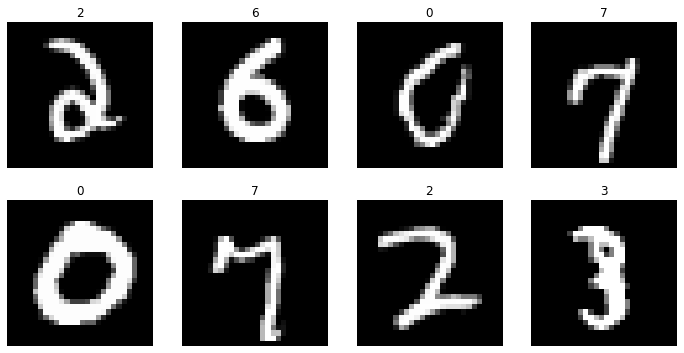

In [ ]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(12,6))
cols, rows = 4,2
for i in range(1,cols*rows+1):
  sample_idx = torch.randint(len(trainset), size=(1,)).item()
  img, label = trainset[sample_idx]
  figure.add_subplot(rows,cols,i)
  plt.title(label)
  plt.axis('off')
  plt.imshow(img.squeeze(),cmap='gray')
plt.show()

In [ ]:
import torch.nn as nn
input = torch.randn(128,20)
print(input)

m = nn.Linear(20,30)
print(m)

output = m(input)
print(out)
print(output.size())

tensor([[-0.7996, -1.5584, -0.9684,  ...,  1.2995, -1.1358, -0.3442],
        [-0.0307, -1.9338, -0.5982,  ..., -1.0375,  0.4164,  1.2832],
        [-1.6677, -0.3681, -0.8841,  ...,  1.5290, -0.5452,  1.0157],
        ...,
        [ 0.5910, -1.3246,  0.2137,  ..., -0.1860, -1.4087, -0.2073],
        [ 0.7370,  2.0818,  2.3532,  ...,  0.2118,  0.3350,  0.9778],
        [-0.5526, -2.0114,  2.0858,  ...,  0.6758, -1.1451,  0.3758]])
Linear(in_features=20, out_features=30, bias=True)
tensor(36., grad_fn=<MeanBackward0>)
torch.Size([128, 30])


In [ ]:
input = torch.randn(20,16,50,100)
print(input.size())

torch.Size([20, 16, 50, 100])


https://gaussian37.github.io/dl-concept-covolution_operation/#dilation-%EC%9D%B4%EB%9E%80-1

dilation은 kernel의 한 픽셀에서 다른 픽셀 까지의 거리를 나타냅니다.


In [ ]:
m = nn.Conv2d(16,33,3,stride=2)
m = nn.Conv2d(16,33,(3,5),stride=(2,1), padding=(4,2))
m = nn.Conv2d(16,33,(3,5),stride=(2,1),padding=(4,2),dilation=(3,1))
print(m)

Conv2d(16, 33, kernel_size=(3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))


In [ ]:
output = m(input)
print(output.size())

torch.Size([20, 33, 26, 100])


In [ ]:
nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5,stride=1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [ ]:
layer = nn.Conv2d(1,20,5,1).to(torch.device('cpu'))
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [ ]:
weight = layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

In [ ]:
# weight는 detach() 후 넘파이로 변환
weight = weight.detach()
weight = weight.numpy()
weight.shape

(20, 1, 5, 5)

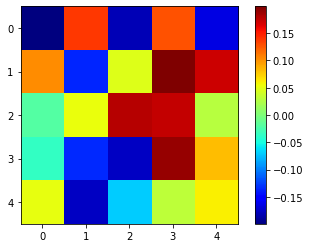

In [ ]:
plt.imshow(weight[0,0,:,:], 'jet')
plt.colorbar()
plt.show()

In [ ]:
print(images.shape)
print(images[0].size())
input_image = torch.squeeze(images[0])
print(input_image.size())

torch.Size([8, 1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])


In [ ]:
input_data =torch.unsqueeze(images[0],dim=0)
print(input_data.size()) # 흑백사진 1장

output_data = layer(input_data)
output = output_data.data 
output_arr = output.numpy()
output_arr.shape

torch.Size([1, 1, 28, 28])


(1, 20, 24, 24)

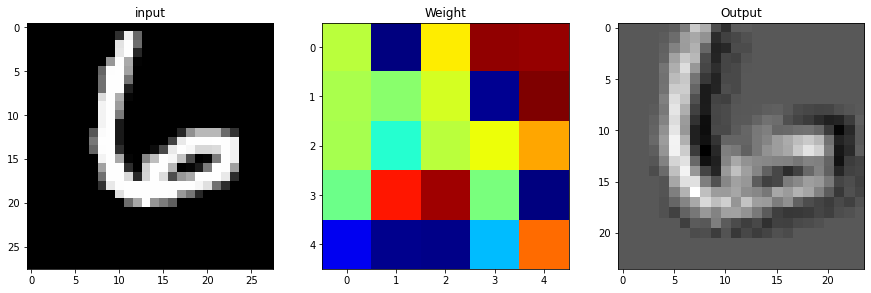

In [ ]:
plt.figure(figsize=(15,30))
plt.subplot(131)
plt.title('input')
plt.imshow(input_image,'gray')

plt.subplot(132)
plt.title('Weight')
plt.imshow(weight[0,0,:,:],'jet')

plt.subplot(133)
plt.title('Output')
plt.imshow(output_arr[0,0,:,:],'gray')
plt.show()

In [ ]:
import torch.nn.functional as F
pool = F.max_pool2d(output,2,2)
pool.shape

torch.Size([1, 20, 12, 12])

In [ ]:
pool_arr = pool.numpy()
pool_arr.shape

(1, 20, 12, 12)

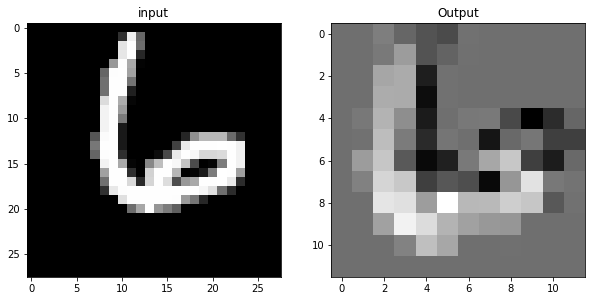

In [ ]:
plt.figure(figsize=(10,15))
plt.subplot(121)
plt.title('input')
plt.imshow(input_image,'gray')

plt.subplot(122)
plt.title('Output')
plt.imshow(pool_arr[0,0,:,:],'gray')

In [ ]:
# Flatten()
flatten = input_image.view(1,28*28)
flatten.shape

torch.Size([1, 784])

In [ ]:
lin = nn.Linear(784,10)(flatten)
lin.shape

torch.Size([1, 10])

In [ ]:
lin

tensor([[ 0.3642,  0.1513, -0.0701, -0.2964,  0.4223,  0.0287,  0.1303,  0.1456,
          0.2693, -0.0620]], grad_fn=<AddmmBackward0>)

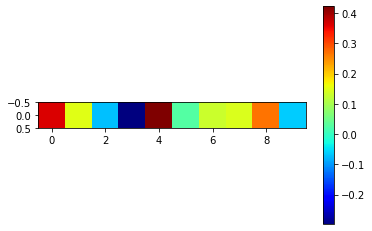

In [ ]:
plt.imshow(lin.detach().numpy(),'jet')
plt.colorbar()
plt.show()

In [ ]:
with torch.no_grad():
  flatten = input_image.view(1,28*28)
  lin = nn.Linear(784,10)(flatten)
  softmax = F.softmax(lin,dim=1)
softmax 

tensor([[0.1281, 0.0787, 0.0685, 0.1051, 0.1387, 0.1013, 0.0693, 0.0705, 0.1240,
         0.1159]])

In [ ]:
import numpy as np
np.sum(softmax.numpy())

1.0

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
inputs = torch.randn(4,3,28,28).to(device)
inputs.shape

torch.Size([4, 3, 28, 28])

In [ ]:
layer = nn.Conv2d(3,20,5,1).to(device)
output = F.relu(layer(inputs))
output.shape

torch.Size([4, 20, 24, 24])

### 모델 정의

nn.Module 상속 클래스 정의
- nn.Module을 상속받는 클래스 정의
- __init__() : 모델에서 사용될 모듈과 활성화 함수 등을 정의
- forward() : 모델에서 실행되어야 하는 연산을 정의

In [2]:
from torch import nn

class Model(nn.Module):
  def __init__(self, inputs):
    super(Model, self).__init__()
    self.layer = nn.Linear(inputs,1)
    self.activation = nn.Sigmoid()

  def forward(self,x):
    x = self.layer(x)
    x = self.activation(x)
    return x


In [3]:
model = Model(1)
print(list(model.children())) # 계층을 보여줌
print()
print(list(model.modules())) # 모듈의 내용을 보여줌

[Linear(in_features=1, out_features=1, bias=True), Sigmoid()]

[Model(
  (layer): Linear(in_features=1, out_features=1, bias=True)
  (activation): Sigmoid()
), Linear(in_features=1, out_features=1, bias=True), Sigmoid()]


In [4]:
class Model(nn.Module):
  def __init__(self):
    super(Model,self).__init__()
    self.layer1 = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(2)
    )

    self.layer2 = nn.Sequential(
        nn.Conv2d(in_channels=64, out_channels=30, kernel_size=5),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(2)
    )

    self.layer3 = nn.Sequential(
        nn.Linear(in_features=30*5*5, out_features=10, bias=True),
        nn.ReLU(inplace=True),
    )

    def forward(self,x):
      x = self.layer1(x)
      x = self.layer2(x)
      x = x.view(x.shape[0],-1)
      x = self.layer3(x)
      return x



In [5]:
model = Model()
print(list(model.children()),'\n')
print(list(model.modules()))

[Sequential(
  (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Linear(in_features=750, out_features=10, bias=True)
  (1): ReLU(inplace=True)
)] 

[Model(
  (layer1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Linear(in_features=750, out_features=10, bias=True)
    (1): ReLU(inplace=True)
  )
), Sequential(
 

### 손실 함수(Loss function)

* 예측 값과 실제 값 사이의 오차 측정
* 학습이 진행되면서 해당 과정이 얼마나 잘 되고 있는지 나타내는 지표
* 모델이 훈련되는 동안 최소화될 값으로 주어진 문제에 대한 성공 지표
* 손실 함수에 따른 결과를 통해 학습 파라미터를 조정
* 최적화 이론에서 최소화 하고자 하는 함수
* 미분 가능한 함수 사용
* 파이토치의 주요 손실 함수
  - `torch.nn.BCELoss`: 이진 분류를 위해 사용
  - `torch.nn.CrossEntropyLoss`: 다중 클래스 분류를 위해 사용
  - `torch.nn.MSELoss`: 회귀 모델에서 사용


### 옵티마이저(Optimizer)

* 손실 함수를 기반으로 모델이 어떻게 업데이트되어야 하는지 결정 (특정 종류의 확률적 경사 하강법 구현)
* optimizer는 `step()`을 통해 전달받은 파라미터를 모델 업데이트
* 모든 옵티마이저의 기본으로 `torch.optim.Optimizer(params, defaults)` 클래스 사용
* `zero_grad()`를 이용해 옵티마이저에 사용된 파라미터들의 기울기를 0으로 설정
* `torch.optim.lr_scheduler`를 이용해 에포크(epochs)에 따라 학습률(learning rate) 조절
* 파이토치의 주요 옵티마이저: `optim.Adadelta`, `optim.Adagrad`, `optim.Adam`, `optim.RMSprop`, `optim.SGD`


### 학습률 스케줄러(Learning rate scheduler)

* 학습시 특정 조건에 따라 학습률을 조정하여 최적화 진행
* 일정 횟수 이상이 되면 학습률을 감소(decay)시키거나 전역 최소점(global minimum) 근처에 가면 학습률을 줄이는 등
* 파이토치의 학습률 스케줄러 종류
  - `optim.lr_scheduler.LambdaLR`: 람다(lambda) 함수를 이용해 그 결과를 학습률로 설정
  - `optim.lr_scheduler.StepLR`: 단계(step)마다 학습률을 감마(gamma) 비율만큼 감소
  - `optim.lr_scheduler.MultiStepLR`: `StepLR`과 비슷하지만 특정 단계가 아니라 지정된 에포크에만 감마 비율로 감소
  - `optim.lr_scheduler.ExponentialLR`: 에포크마다 이전 학습률에 감마만큼 곱함
  - `optim.lr_scheduler.CosineAnnealingLR`: 학습률을 코사인(cosine) 함수의 형태처럼 변화시켜 학습률이 커지기도 하고 작아지기도 함
  - `optim.lr_scheduler.ReduceLROnPlateau`: 학습이 잘되는지 아닌지에 따라 동적으로 학습률 변화


### FashionMNIST 분류 모델

In [6]:
import torchvision
from torch.utils.data import Dataset,DataLoader
from torchvision import datasets
import torchvision.transforms as transforms

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,))])

In [7]:
trainset = datasets.FashionMNIST(root='/content/',
                                 train=True, download=True,
                                 transform=transform)
testset = datasets.FashionMNIST(root='/content/',
                                 train=False, download=True,
                                 transform=transform)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting /content/FashionMNIST/raw/train-images-idx3-ubyte.gz to /content/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting /content/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /content/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting /content/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /content/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting /content/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /content/FashionMNIST/raw



In [8]:
train_loader = DataLoader(trainset,batch_size=128,shuffle=True,num_workers=2)
test_loader = DataLoader(testset,batch_size=128,shuffle=True,num_workers=2)

In [9]:
images, labels = next(iter(train_loader)) # 데이터에 접근하려면 python의 내장함수 iter와 next를 사용
images.shape, labels.shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

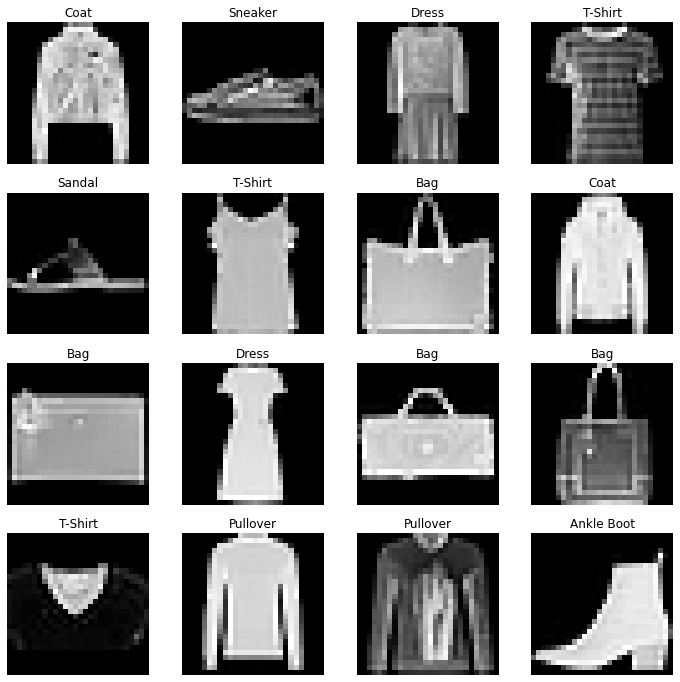

In [11]:
import matplotlib.pyplot as plt

labels_map = {
    0:'T-Shirt',
    1:'Trouser',
    2:'Pullover',
    3:'Dress',
    4:'Coat',
    5:'Sandal',
    6:'Shirt',
    7:'Sneaker',
    8:'Bag',
    9:'Ankle Boot',
}
figure = plt.figure(figsize=(12,12))
cols,rows = 4,4
for i in range(1,cols*rows+1):
  image = images[i].squeeze()
  label_idx = labels[i].item()
  label = labels_map[label_idx]

  figure.add_subplot(rows,cols,i)
  plt.title(label)
  plt.axis('off')
  plt.imshow(image,cmap='gray')
plt.show()


In [12]:
# 모델 정의 및 파라미터
import torch.nn.functional as F 
class NeuralNet(nn.Module):
  def __init__(self):
    super(NeuralNet,self).__init__()

    self.conv1 = nn.Conv2d(1,6,3)
    self.conv2 = nn.Conv2d(6,16,3)
    self.fc1 = nn.Linear(16*5*5,120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)

  def forward(self,x):
    x = F.max_pool2d(F.relu(self.conv1(x)),(2,2))
    x = F.max_pool2d(F.relu(self.conv2(x)), 2)
    x = x.view(-1, self.num_flat_features(x)) 
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

  def num_flat_features(self,x):
    size = x.size()[1:]
    num_features = 1
    for s in size:
      num_features *= s
    return num_features

net = NeuralNet()
print(net)
    

NeuralNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [16]:
# 손실함수와 옵티마이저
import torch.optim as optim 
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum=0.9)

In [14]:
# 배치수 확인
total_batch = len(train_loader)
total_batch

469

zero_grad()

- 일반적으로 딥러닝에서는 미니배치 + 루프 조합을 사용해서 parameter들을 업데이트하는데 한 루프에서 업데이트를 위해 loss.backward()를 호출하면 각 파라미터들의 .grad 값에 변화도가 저장된다.
- 이후 다음 루프에서 zero_grad()를 하지 않고 역전파을 시키면 이전 루프에서 .grad에 저장된 값이 다음 루프의 업데이트에도 간섭을 해서 원하는 방향으로 학습이 안되는 경향이 있다.
- 따라서 루프가 한번 돌고 나서 역전파를 하기전에 반드시 zero_grad()로 .grad값들을 0으로 초기화시킨 후 학습을 진행한다.

In [18]:
for epoch in range(10):
  running_loss = 0.0 # 초기화
  for i, data in enumerate(train_loader,0):
    inputs, labels = data 
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs,labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    if i % 100 == 99:
      print('Epoch:{}, iter:{}, Loss:{}'.format(epoch+1,i+1,running_loss/2000))
      running_loss = 0.0


Epoch:1, iter:100, Loss:0.011511935031414032
Epoch:1, iter:200, Loss:0.011461537611484527
Epoch:1, iter:300, Loss:0.01139072812795639
Epoch:1, iter:400, Loss:0.011276404571533203
Epoch:2, iter:100, Loss:0.010318541514873505
Epoch:2, iter:200, Loss:0.007743702054023743
Epoch:2, iter:300, Loss:0.005253702268004417
Epoch:2, iter:400, Loss:0.004300769555568695
Epoch:3, iter:100, Loss:0.0037180238127708437
Epoch:3, iter:200, Loss:0.003568357902765274
Epoch:3, iter:300, Loss:0.0035199873268604276
Epoch:3, iter:400, Loss:0.0033049759402871133
Epoch:4, iter:100, Loss:0.003192636552453041
Epoch:4, iter:200, Loss:0.0031822206601500513
Epoch:4, iter:300, Loss:0.0031611164838075637
Epoch:4, iter:400, Loss:0.0030308103576302528
Epoch:5, iter:100, Loss:0.0030215797275304794
Epoch:5, iter:200, Loss:0.002944867554306984
Epoch:5, iter:300, Loss:0.002942951127886772
Epoch:5, iter:400, Loss:0.002902389021217823
Epoch:6, iter:100, Loss:0.0027937339261174202
Epoch:6, iter:200, Loss:0.0027956246346235274
Ep

In [19]:
!pwd

/content


In [20]:
PATH = './fashion_mnist.pth'
torch.save(net.state_dict(), PATH)

In [21]:
net = NeuralNet()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [22]:
net.parameters

<bound method Module.parameters of NeuralNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)>

In [25]:
# 모델 테스트
import numpy as np
def imshow(image):
  image = image / 2 + 0.5
  npimg = image.numpy()

  fig = plt.figure(figsize=(16,8))
  plt.imshow(np.transpose(npimg,(1,2,0))) # rgb -> gbr
  plt.show()

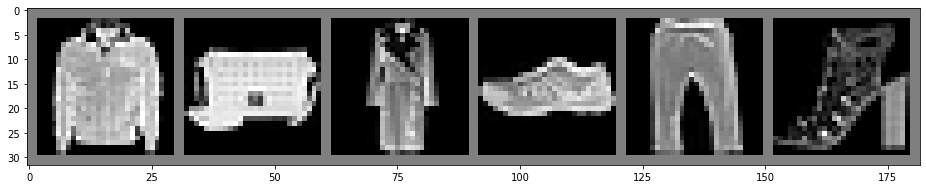

In [26]:
import torchvision

dataiter = iter(test_loader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images[:6]))

In [27]:
import torch
import torch.nn as nn

data = torch.randn((5,5))
print(data)
print(torch.max(data,dim=1))

tensor([[ 0.3074, -0.0732, -0.5624, -0.6760, -0.4158],
        [-1.2429, -1.5442, -1.1159,  1.4915, -0.2074],
        [ 1.7952,  0.8774, -0.2052, -2.4470,  0.0409],
        [-0.0514, -0.1241, -2.4191,  0.4177,  0.9871],
        [-0.5573, -1.9569,  0.9067,  1.0472,  0.9507]])
torch.return_types.max(
values=tensor([0.3074, 1.4915, 1.7952, 0.9871, 1.0472]),
indices=tensor([0, 3, 0, 4, 3]))


In [28]:
outputs = net(images)
print(outputs)
_,predicted = torch.max(outputs,1) 
print(predicted)


tensor([[ 1.9732, -3.5076,  4.6509,  ..., -7.5958,  5.4526, -5.4084],
        [ 1.4570, -5.6757,  1.9161,  ..., -3.3066,  8.7928, -1.6611],
        [ 3.1790, -1.7654,  0.1582,  ..., -0.7617,  2.5719, -5.8805],
        ...,
        [-1.1256, -6.3294, -4.4759,  ...,  8.5131,  3.4531, 11.8178],
        [ 2.4574, -0.3780,  5.3617,  ..., -8.8729,  3.1069, -6.2896],
        [ 2.7240, -6.0015,  1.6471,  ..., -2.2013,  6.9959, -1.7171]],
       grad_fn=<AddmmBackward0>)
tensor([6, 8, 3, 7, 1, 5, 2, 5, 7, 2, 2, 1, 0, 1, 8, 3, 4, 7, 2, 7, 4, 5, 2, 1,
        2, 3, 7, 6, 9, 4, 3, 5, 4, 2, 7, 1, 5, 6, 2, 7, 8, 0, 4, 7, 0, 4, 7, 1,
        2, 9, 6, 1, 0, 1, 6, 6, 5, 3, 7, 3, 0, 7, 7, 2, 5, 0, 6, 0, 8, 4, 8, 4,
        3, 6, 1, 3, 5, 6, 1, 1, 7, 7, 8, 9, 4, 3, 4, 8, 8, 9, 7, 7, 0, 2, 3, 4,
        8, 6, 4, 3, 9, 8, 8, 7, 1, 9, 7, 8, 6, 2, 4, 7, 4, 9, 7, 1, 5, 1, 1, 3,
        3, 5, 2, 7, 5, 9, 6, 8])


In [30]:
print(''.join('{}, '.format(labels_map[int(predicted[j].numpy())]) for j in range(6)))

Shirt, Bag, Dress, Sneaker, Trouser, Sandal, 


In [32]:
correct = 0
total = 0

with torch.no_grad():
  for data in test_loader:
    images, labels = data
    outputs = net(images)
    _,predicted = torch.max(outputs.data,1) 
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
  print(100 * correct / total)

81.59
